In [29]:
import multiprocessing
import threading
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Get the number of CPU threads
nThreads = multiprocessing.cpu_count()
print("Number of CPU threads:", nThreads)

Number of CPU threads: 16


In [31]:
# Function for multiplying two matrices
def matrix_multiply(mat1, mat2):
    return np.dot(mat1, mat2)

# Function to perform matrix multiplications within a thread
def mat_mul_in_thread(num_matrices, matrix_size, constant_matrix, results, results_lock):
    for _ in range(num_matrices):
        random_matrix = np.random.rand(*matrix_size)
        
        # Perform matrix multiplication
        result = matrix_multiply(random_matrix, constant_matrix)
        
        # Append result to the shared results list using a lock
        with results_lock:
            results.append(result)

In [32]:
def main(num_threads):
    matrix_size = (1000, 1000)
    num_matrices = 100

    # Create random matrices and constant matrix
    constant_matrix = np.random.rand(*matrix_size)

    # List to hold results
    results = []
    results_lock = threading.Lock()  # Lock to safely append results

    threads = []

    # Distribute matrices evenly among threads
    matrices_per_thread = num_matrices // num_threads
    remaining_matrices = num_matrices % num_threads

    start_time = time.time()

    for _ in range(num_threads):
        # Assign number of matrices to the current thread
        if remaining_matrices > 0:
            matrices_assigned = matrices_per_thread + 1
            remaining_matrices -= 1
        else:
            matrices_assigned = matrices_per_thread

        # Create and start a new thread
        thread = threading.Thread(
            target=mat_mul_in_thread,
            args=(matrices_assigned, matrix_size, constant_matrix, results, results_lock),
        )
        threads.append(thread)
        thread.start()

    # Wait for all threads to complete
    for thread in threads:
        thread.join()

    # End time measurement
    end_time = time.time()

    # Calculate total time taken
    total_time = end_time - start_time

    print(f"Total time taken with {num_threads} threads: {total_time:.4f} seconds")
    return total_time

In [33]:
# Test different numbers of threads
num_threads = list(range(1, nThreads + 1))
execution_times = []

for num_thread in num_threads:
    execution_time = main(num_thread)
    execution_times.append(execution_time)

Total time taken with 1 threads: 2.4259 seconds
Total time taken with 2 threads: 1.6529 seconds
Total time taken with 3 threads: 1.7440 seconds
Total time taken with 4 threads: 1.7935 seconds
Total time taken with 5 threads: 1.7069 seconds
Total time taken with 6 threads: 1.7754 seconds
Total time taken with 7 threads: 1.9557 seconds
Total time taken with 8 threads: 1.7685 seconds
Total time taken with 9 threads: 1.8954 seconds
Total time taken with 10 threads: 1.9885 seconds
Total time taken with 11 threads: 1.8642 seconds
Total time taken with 12 threads: 1.8296 seconds
Total time taken with 13 threads: 1.7640 seconds
Total time taken with 14 threads: 1.7633 seconds
Total time taken with 15 threads: 1.9382 seconds
Total time taken with 16 threads: 1.8222 seconds


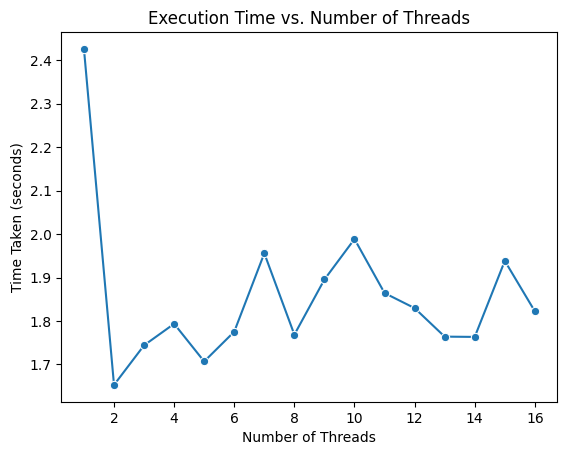

In [34]:
# Plot the results
sns.lineplot(x=num_threads, y=execution_times, marker='o')
plt.title('Execution Time vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (seconds)')
plt.show()